<a href="https://colab.research.google.com/github/alongiladi/Machine_Learning_With_Python/blob/main/svm_decision_trees_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to the original dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

# About the dataset


* age: The person's age in years
* sex: The person's sex (1 = male, 0 = female)
* cp: chest pain type
  * Value 0: asymptomatic
  * Value 1: atypical angina
  * Value 2: non-anginal pain
  * Value 3: typical angina
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
* chol: The person's cholesterol measurement in mg/dl
* fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* restecg: resting electrocardiographic results
  * Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria
  * Value 1: normal
  * Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* thalach: The person's maximum heart rate achieved
* exang: Exercise induced angina (1 = yes; 0 = no)
* oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* slope: the slope of the peak exercise ST segment
  * 0: downsloping; 1: flat; 2: upsloping
* ca: The number of major vessels (0–3)
* thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
  * Value 1: fixed defect (no blood flow in some part of the heart)
  * Value 2: normal blood flow
  * Value 3: reversible defect (a blood flow is observed but it is not normal)
* target: Heart disease (1 = no, 0= yes)



---



---



# Experiment Procedure:



*   Explore the Data
*   Split the Data
*   Scale the Data
*   Train and evaluate SVM with linear kernel
*   Train and evaluate SVM with polynomial kernel
*   Train and evaluate SVM with rbf kernel
*   Train and evaluate Decision Tree
*   Train and evaluate Random Forest
*   Compare Results
*   Hyperparameter Optimization for Best Model

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# Explore & Visualize the Data

In [ ]:
#Link to the dataset
url = "https://raw.githubusercontent.com/schauppi/Intro_ML/main/datasets/heart.csv"

## Code Explanation

1. `data = pd.read_csv(url)`: This line reads a CSV file from the given URL. The `read_csv` function from pandas is used for this purpose, and the resulting DataFrame is stored in the variable `data`.

2. `data.head()`: This line displays the first five rows of the DataFrame `data`. The `head()` function is a convenient way to quickly inspect the initial part of a large DataFrame.

## Code

In [ ]:
# Read a CSV file from the specified URL and store it in the variable 'data'
data = pd.read_csv(url)

# Display the first five rows of the dataframe
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Code Explanation

1. `data.isnull().sum()`: This line calculates the total number of missing values (null values) in each column of the DataFrame `data`. The `isnull()` function is used to create a Boolean DataFrame where `True` indicates missing values. The `sum()` function is then applied to count the number of `True` values (i.e., nulls) in each column. This is useful for data cleaning and preprocessing, as it helps in identifying columns with a significant number of missing values.

## Code

In [ ]:
# Calculate the sum of missing values (null values) in each column of the DataFrame 'data'
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


## Code Explanation

1. `data.info()`: This line calls the `info()` function on the DataFrame `data`. The `info()` function provides a concise summary of the DataFrame, including the number of entries, the column names, the number of non-null values in each column, and the data types of each column. Additionally, it can provide information about the memory usage of the DataFrame. This function is especially useful for initial data exploration and to quickly assess data quality, such as the presence of missing values and the consistency of data types across columns.

## Code

In [ ]:
# Display a concise summary of the DataFrame 'data', including column types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Code Explanation

1. `data.describe()`: This line generates descriptive statistics for the DataFrame `data`. The `describe()` function in pandas provides a summary of the central tendency, dispersion, and shape of the dataset's distribution, excluding NaN (null) values. It typically includes statistics like mean, standard deviation, minimum, maximum, and quartiles for numerical columns. For object-type columns (like strings or timestamps), it provides counts, unique values, top (most frequent) values, and their frequency. This function is highly useful for getting a quick overview of the numerical aspects of a dataset.

## Code

In [ ]:
# Generate descriptive statistics for the DataFrame 'data'
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Code Explanation

1. **Age Distribution Plot**
   - `plt.figure(figsize=(10, 6))`: Sets the size of the plot to 10 inches wide and 6 inches tall.
   - `sns.histplot(data['age'], bins=20, kde=True)`: Creates a histogram of the 'age' column from the 'data' DataFrame. It uses 20 bins and includes a Kernel Density Estimate (KDE) line for a smooth representation of the distribution.
   - `plt.title('Age Distribution')`: Adds the title 'Age Distribution' to the plot.
   - `plt.xlabel('Age')` and `plt.ylabel('Count')`: Labels the x-axis as 'Age' and the y-axis as 'Count'.
   - `plt.grid(True)`: Enables a grid on the plot to improve readability.
   - `plt.show()`: Displays the plot.

## Code

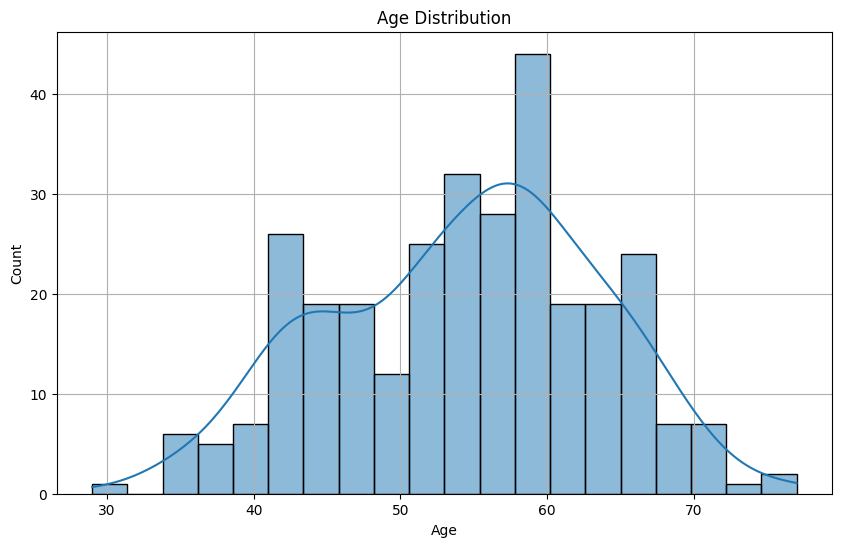

In [ ]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## Code Explanation

1. `plt.figure(figsize=(10,10))`: This line of code sets up a new figure for plotting with a specified size of 10x10 inches. This size is chosen to ensure that the heatmap is large enough to be easily readable and interpretable.

2. `sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f")`: This line creates a heatmap of the correlation matrix for the DataFrame `data`.
    - `data.corr()`: Calculates the pairwise correlation of columns.
    - `annot=True`: Annotations are added to each cell of the heatmap, showing the correlation coefficients.
    - `cmap='coolwarm'`: Sets the color scheme of the heatmap to 'coolwarm', which is a gradient from blue (cool) to red (warm). This makes it easier to distinguish between different levels of correlation.
    - `fmt=".1f"`: Formats the annotation to one decimal place for better readability.

3. `plt.show()`: Displays the heatmap. This is a standard command in Matplotlib to render the plot.


## Code

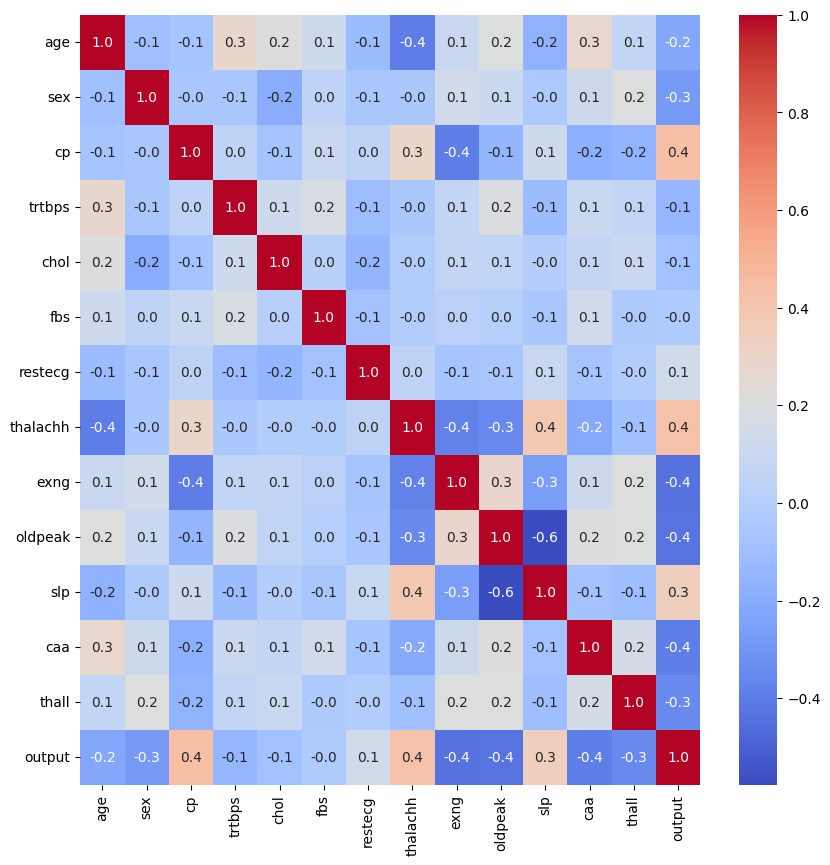

In [ ]:
# Create a figure with a size of 10x10 inches
plt.figure(figsize=(10,10))

# Generate a heatmap using Seaborn to visualize the correlation matrix of 'data'.
# 'annot=True' displays the correlation values, 'cmap' sets the color map to 'coolwarm',
# and 'fmt=".1f"' formats the annotation to one decimal place.
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".1f")

# Display the plot
plt.show()

# Feature Selection Based on Correlation

To demonstrate the impact of feature selection, we'll create a second dataset using only features that have a strong correlation with the target variable. This will allow us to compare model performance when using all features versus using only the most relevant features.

## Code Explanation

1. `correlation_matrix = data.corr()`: Calculates the correlation matrix for all features in the dataset.

2. `target_correlation = correlation_matrix['output'].abs().sort_values(ascending=False)`: Extracts the absolute correlation values between each feature and the target variable, then sorts them in descending order.

3. `threshold = 0.2`: Sets the correlation threshold. Features with absolute correlation greater than 0.2 will be selected.

4. `high_corr_features.remove('output')`: Removes the target variable itself from the feature list, as we only want predictor variables.

5. `X_high_corr = data[high_corr_features]`: Creates a new dataset containing only the selected high-correlation features.

## Code

In [ ]:
# Calculate absolute correlation with target
correlation_matrix = data.corr()
target_correlation = correlation_matrix['output'].abs().sort_values(ascending=False)

print("Correlation with target variable:")
print(target_correlation)
print("\n" + "="*70)

# Select features with correlation > 0.2
threshold = 0.2
high_corr_features = target_correlation[target_correlation > threshold].index.tolist()
high_corr_features.remove('output')  # Remove target itself

print(f"\nFeatures with correlation > {threshold}:")
print(high_corr_features)
print(f"\nNumber of selected features: {len(high_corr_features)} out of {len(data.columns)-1}")

# Create high-correlation dataset
X_high_corr = data[high_corr_features]

Correlation with target variable:
output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64


Features with correlation > 0.2:
['exng', 'cp', 'oldpeak', 'thalachh', 'caa', 'slp', 'thall', 'sex', 'age']

Number of selected features: 9 out of 13


# Prepare the Data

## Code Explanation

1. `X = data.drop('output', axis=1)`: This line of code is used to create a new DataFrame named `X` by dropping the 'output' column from the `data` DataFrame. The `drop` method is used, with `axis=1` indicating that the column named 'output' should be dropped.
2. `y = data['output']`: This line extracts the 'output' column from the `data` DataFrame and stores it in a new variable `y`. This is typically done to separate the features (`X`) from the target variable (`y`) in a dataset, especially in supervised learning scenarios.

## Code

In [ ]:
# Drop the 'output' column from the data and store the resulting DataFrame in X
X = data.drop('output', axis=1)

# Select the 'output' column from the data and store the resulting Series in y
y = data['output']

# Split the data

## Code Explanation

## Code Explanation

1. `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)`: Splits the full feature set into training and testing sets (70%/30% split).

2. `X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(X_high_corr, y, test_size=0.3, random_state=42)`: Splits the high-correlation feature set into training and testing sets using the same random state to ensure consistent splitting across both datasets.

## Code

In [ ]:
# Split data with all features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Split data with high-correlation features
X_train_hc, X_test_hc, y_train_hc, y_test_hc = train_test_split(X_high_corr, y, test_size=0.3, random_state=42)

In [ ]:
# Print the shapes of the data with all features
print("ALL FEATURES:")
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

print("\n" + "="*70)

# Print the shapes of the data with high-correlation features
print("HIGH-CORRELATION FEATURES:")
print('X_train_hc shape: ', X_train_hc.shape)
print('X_test_hc shape: ', X_test_hc.shape)
print('y_train_hc shape: ', y_train_hc.shape)
print('y_test_hc shape: ',y_test_hc.shape)

ALL FEATURES:
X_train shape:  (212, 13)
X_test shape:  (91, 13)
y_train shape:  (212,)
y_test shape:  (91,)

HIGH-CORRELATION FEATURES:
X_train_hc shape:  (212, 9)
X_test_hc shape:  (91, 9)
y_train_hc shape:  (212,)
y_test_hc shape:  (91,)


# Scale the data

## Code Explanation

## Code Explanation

**For All Features:**

1. `scaler = StandardScaler()`: Initializes a StandardScaler for the full feature set.

2. `X_train_scaled = scaler.fit_transform(X_train)`: Computes the mean and standard deviation from X_train and scales the training data.

3. `X_test_scaled = scaler.transform(X_test)`: Scales the test data using the parameters learned from the training data.

**For High-Correlation Features:**

4. `scaler_hc = StandardScaler()`: Initializes a separate StandardScaler for the high-correlation feature set.

5. `X_train_scaled_hc = scaler_hc.fit_transform(X_train_hc)`: Computes mean and standard deviation from X_train_hc and scales the training data.

6. `X_test_scaled_hc = scaler_hc.transform(X_test_hc)`: Scales the test data using the parameters learned from the high-correlation training data.

**Note:** We use separate scalers for each feature set to ensure each is scaled based on its own distribution.

## Code

In [ ]:
# Scale data with all features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scale data with high-correlation features
scaler_hc = StandardScaler()
X_train_scaled_hc = scaler_hc.fit_transform(X_train_hc)
X_test_scaled_hc = scaler_hc.transform(X_test_hc)

# Create Evaluation Function

## Code Explanation

This function evaluates a trained model and prints its performance metrics:

1. `y_pred = model.predict(X_test)`: Predicts labels for the test data using the trained model.

2. `accuracy = accuracy_score(y_test, y_pred)`: Calculates the accuracy score, which measures the proportion of correct predictions.

3. `f1 = f1_score(y_test, y_pred)`: Calculates the F1 score, which is the harmonic mean of precision and recall, providing a balanced measure of model performance.

4. `precision = precision_score(y_test, y_pred)`: Calculates precision, which measures the accuracy of positive predictions.

5. `recall = recall_score(y_test, y_pred)`: Calculates recall, which measures the proportion of actual positives that were correctly identified.

6. The function then prints all metrics in a formatted way and returns them as a tuple for later comparison.

## Code

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluate a trained model and print performance metrics.

    Parameters:
    - model: trained model object
    - X_test: test features
    - y_test: true test labels
    - model_name: string name for display

    Returns:
    - tuple: (accuracy, f1, precision, recall)
    """
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print(f"=== {model_name} ===")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print()

    return accuracy, f1, precision, recall

# Support Vector Machine - Linear

## Code Explanation

1. `svm_linear = SVC(kernel='linear', C=1)`: This line initializes a Support Vector Classifier (SVC) with a linear kernel. The `kernel='linear'` parameter specifies that a linear kernel is used, making it suitable for linearly separable data. The `C` parameter is set to 1, which controls the trade-off between a smooth decision boundary and classifying training points correctly. A `C` value of 1 represents a balanced approach between these two objectives.

2. `svm_linear.fit(X_train_scaled, y_train)`: Here, the `fit` method is called on the `svm_linear` object to train the classifier. The model is trained using `X_train_scaled`, which is the standardized version of the training data, ensuring that each feature contributes equally to the decision process. `y_train` contains the target labels. This process involves finding the optimal hyperplane that separates the classes in the feature space.

## Code

In [ ]:
# Model with all features
svm_linear_full = SVC(kernel='linear', C=1)
svm_linear_full.fit(X_train_scaled, y_train)
print("WITH ALL FEATURES:")
results_linear_full = evaluate_model(svm_linear_full, X_test_scaled, y_test, "SVM Linear (All Features)")

# Model with high-correlation features
svm_linear_hc = SVC(kernel='linear', C=1)
svm_linear_hc.fit(X_train_scaled_hc, y_train_hc)
print("WITH HIGH-CORRELATION FEATURES:")
results_linear_hc = evaluate_model(svm_linear_hc, X_test_scaled_hc, y_test_hc, "SVM Linear (High Corr)")

WITH ALL FEATURES:
=== SVM Linear (All Features) ===
Accuracy:  0.8132
F1 Score:  0.8317
Precision: 0.8235
Recall:    0.8400

WITH HIGH-CORRELATION FEATURES:
=== SVM Linear (High Corr) ===
Accuracy:  0.8132
F1 Score:  0.8317
Precision: 0.8235
Recall:    0.8400



# Support Vector Machine - Polynomial

## Code Explanation

1. `svm_poly = SVC(kernel='poly', C=1, degree=3)`: This line initializes a Support Vector Classifier (SVC) with a polynomial kernel. The `kernel='poly'` specifies that a polynomial kernel is used, which can handle more complex, non-linear relationships in the data. The `C` parameter is set to 1, indicating a balance between a smooth decision boundary and correct classification of training points. The `degree=3` parameter sets the degree of the polynomial kernel to 3, meaning the kernel function will consider up to cubic terms in the input features for creating the decision boundary.

2. `svm_poly.fit(X_train_scaled, y_train)`: In this line, the `fit` method is used to train the SVM model on the scaled training data. `X_train_scaled` refers to the training data that has been scaled, usually to normalize feature scales for more effective training. `y_train` contains the corresponding target labels. The training process involves the SVM finding the optimal hyperplane in the transformed feature space that best separates the classes, taking into account the polynomial transformations of the features.

## Code

In [ ]:
# Model with all features
svm_poly_full = SVC(kernel='poly', C=1, degree=3)
svm_poly_full.fit(X_train_scaled, y_train)
print("WITH ALL FEATURES:")
results_poly_full = evaluate_model(svm_poly_full, X_test_scaled, y_test, "SVM Polynomial (All Features)")

# Model with high-correlation features
svm_poly_hc = SVC(kernel='poly', C=1, degree=3)
svm_poly_hc.fit(X_train_scaled_hc, y_train_hc)
print("WITH HIGH-CORRELATION FEATURES:")
results_poly_hc = evaluate_model(svm_poly_hc, X_test_scaled_hc, y_test_hc, "SVM Polynomial (High Corr)")

WITH ALL FEATURES:
=== SVM Polynomial (All Features) ===
Accuracy:  0.8352
F1 Score:  0.8515
Precision: 0.8431
Recall:    0.8600

WITH HIGH-CORRELATION FEATURES:
=== SVM Polynomial (High Corr) ===
Accuracy:  0.8571
F1 Score:  0.8713
Precision: 0.8627
Recall:    0.8800



# Support Vector Machine - Radial Basis Function

## Code Explanation

1. `svm_rbf = SVC(kernel='rbf', C=1, gamma=1)`: This line of code initializes a Support Vector Classifier (SVC) with a Radial Basis Function (RBF) kernel. The `kernel='rbf'` parameter indicates the use of the RBF kernel, which is effective for non-linear data. The `C` parameter, set to 1, controls the trade-off between creating a smooth decision boundary and classifying all training points correctly. The `gamma` parameter, set to 1, defines the influence of individual training examples; a higher `gamma` value leads to a more complex model that might fit the training data better but could also cause overfitting.

2. `svm_rbf.fit(X_train_scaled, y_train)`: This line trains the SVM model using the `fit` method on the scaled training dataset. `X_train_scaled` represents the feature variables that have been scaled, ensuring equal contribution of each feature to the decision-making process. `y_train` contains the target labels. The training involves the SVM model finding the optimal hyperplane in the transformed feature space, considering the RBF kernel's properties.

## Code

In [ ]:
# Model with all features
svm_rbf_full = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf_full.fit(X_train_scaled, y_train)
print("WITH ALL FEATURES:")
results_rbf_full = evaluate_model(svm_rbf_full, X_test_scaled, y_test, "SVM RBF (All Features)")

# Model with high-correlation features
svm_rbf_hc = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf_hc.fit(X_train_scaled_hc, y_train_hc)
print("WITH HIGH-CORRELATION FEATURES:")
results_rbf_hc = evaluate_model(svm_rbf_hc, X_test_scaled_hc, y_test_hc, "SVM RBF (High Corr)")

WITH ALL FEATURES:
=== SVM RBF (All Features) ===
Accuracy:  0.5714
F1 Score:  0.7111
Precision: 0.5647
Recall:    0.9600

WITH HIGH-CORRELATION FEATURES:
=== SVM RBF (High Corr) ===
Accuracy:  0.7473
F1 Score:  0.7527
Precision: 0.8140
Recall:    0.7000



# Decision Tree

## Code Explanation

1. `decision_tree = DecisionTreeClassifier(max_depth=5, random_state=42)`: This line initializes a Decision Tree Classifier with a maximum depth of 5. The `max_depth` parameter controls the maximum depth of the tree, which helps prevent overfitting by limiting how complex the tree can become. The `random_state=42` parameter ensures reproducibility by fixing the random seed used in the algorithm.

2. `decision_tree.fit(X_train_scaled, y_train)`: This line trains the decision tree model on the scaled training data using the `fit` method. Although decision trees don't require scaled features to work, we use the scaled data here for consistency with the other models in this comparison.

## Code

In [ ]:
# Model with all features
decision_tree_full = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_full.fit(X_train_scaled, y_train)
print("WITH ALL FEATURES:")
results_dt_full = evaluate_model(decision_tree_full, X_test_scaled, y_test, "Decision Tree (All Features)")

# Model with high-correlation features
decision_tree_hc = DecisionTreeClassifier(max_depth=5, random_state=42)
decision_tree_hc.fit(X_train_scaled_hc, y_train_hc)
print("WITH HIGH-CORRELATION FEATURES:")
results_dt_hc = evaluate_model(decision_tree_hc, X_test_scaled_hc, y_test_hc, "Decision Tree (High Corr)")

WITH ALL FEATURES:
=== Decision Tree (All Features) ===
Accuracy:  0.7363
F1 Score:  0.7500
Precision: 0.7826
Recall:    0.7200

WITH HIGH-CORRELATION FEATURES:
=== Decision Tree (High Corr) ===
Accuracy:  0.7473
F1 Score:  0.7527
Precision: 0.8140
Recall:    0.7000



# Random Forest

## Code Explanation

1. `random_forest = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)`: This line initializes a Random Forest Classifier. The `max_depth=5` parameter limits the maximum depth of each tree in the forest, helping to prevent overfitting. The `n_estimators=100` parameter specifies that the forest will contain 100 decision trees. More trees generally lead to better performance but also longer training times. The `random_state=42` ensures reproducibility.

2. `random_forest.fit(X_train_scaled, y_train)`: This line trains the Random Forest model on the scaled training data. Random Forest is an ensemble method that builds multiple decision trees and aggregates their predictions to make a final prediction, which typically results in better performance and robustness compared to a single decision tree.

## Code

In [ ]:
# Model with all features
random_forest_full = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
random_forest_full.fit(X_train_scaled, y_train)
print("WITH ALL FEATURES:")
results_rf_full = evaluate_model(random_forest_full, X_test_scaled, y_test, "Random Forest (All Features)")

# Model with high-correlation features
random_forest_hc = RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42)
random_forest_hc.fit(X_train_scaled_hc, y_train_hc)
print("WITH HIGH-CORRELATION FEATURES:")
results_rf_hc = evaluate_model(random_forest_hc, X_test_scaled_hc, y_test_hc, "Random Forest (High Corr)")

WITH ALL FEATURES:
=== Random Forest (All Features) ===
Accuracy:  0.8352
F1 Score:  0.8544
Precision: 0.8302
Recall:    0.8800

WITH HIGH-CORRELATION FEATURES:
=== Random Forest (High Corr) ===
Accuracy:  0.8132
F1 Score:  0.8283
Precision: 0.8367
Recall:    0.8200



# Results Comparison

## Code Explanation

This section compares the performance of all five models:

1. A DataFrame is created containing all the evaluation metrics (Accuracy, F1 Score, Precision, Recall) for each model.

2. `results_df['F1 Score'].idxmax()`: Finds the index of the model with the highest F1 score. The F1 score is often preferred for model selection as it balances precision and recall.

3. The best model is identified and its performance metrics are highlighted for easy comparison.

## Code

In [ ]:
# Group results by algorithm for easy comparison
print("\n" + "="*70)
print("MODEL COMPARISON - GROUPED BY ALGORITHM")
print("="*70)

algorithms = ['SVM Linear', 'SVM Polynomial', 'SVM RBF', 'Decision Tree', 'Random Forest']
all_results = [
    (results_linear_full, results_linear_hc),
    (results_poly_full, results_poly_hc),
    (results_rbf_full, results_rbf_hc),
    (results_dt_full, results_dt_hc),
    (results_rf_full, results_rf_hc)
]

# Track best model
best_f1 = 0
best_model_name = ""
best_model_type = ""  # "All Features" or "High Corr"

for algo, (res_full, res_hc) in zip(algorithms, all_results):
    print(f"\n{algo}:")
    print(f"  All Features:      Acc={res_full[0]:.4f}, F1={res_full[1]:.4f}, Prec={res_full[2]:.4f}, Rec={res_full[3]:.4f}")
    print(f"  High-Corr Features: Acc={res_hc[0]:.4f}, F1={res_hc[1]:.4f}, Prec={res_hc[2]:.4f}, Rec={res_hc[3]:.4f}")
    diff = res_hc[1] - res_full[1]  # F1 score difference
    print(f"  Difference (F1):    {diff:+.4f}")

    # Track best model
    if res_full[1] > best_f1:
        best_f1 = res_full[1]
        best_model_name = algo
        best_model_type = "All Features"
    if res_hc[1] > best_f1:
        best_f1 = res_hc[1]
        best_model_name = algo
        best_model_type = "High Corr"

print("\n" + "="*70)
print(f"Best Model: {best_model_name} ({best_model_type})")
print(f"Best F1 Score: {best_f1:.4f}")
print("="*70)


MODEL COMPARISON - GROUPED BY ALGORITHM

SVM Linear:
  All Features:      Acc=0.8132, F1=0.8317, Prec=0.8235, Rec=0.8400
  High-Corr Features: Acc=0.8132, F1=0.8317, Prec=0.8235, Rec=0.8400
  Difference (F1):    +0.0000

SVM Polynomial:
  All Features:      Acc=0.8352, F1=0.8515, Prec=0.8431, Rec=0.8600
  High-Corr Features: Acc=0.8571, F1=0.8713, Prec=0.8627, Rec=0.8800
  Difference (F1):    +0.0198

SVM RBF:
  All Features:      Acc=0.5714, F1=0.7111, Prec=0.5647, Rec=0.9600
  High-Corr Features: Acc=0.7473, F1=0.7527, Prec=0.8140, Rec=0.7000
  Difference (F1):    +0.0416

Decision Tree:
  All Features:      Acc=0.7363, F1=0.7500, Prec=0.7826, Rec=0.7200
  High-Corr Features: Acc=0.7473, F1=0.7527, Prec=0.8140, Rec=0.7000
  Difference (F1):    +0.0027

Random Forest:
  All Features:      Acc=0.8352, F1=0.8544, Prec=0.8302, Rec=0.8800
  High-Corr Features: Acc=0.8132, F1=0.8283, Prec=0.8367, Rec=0.8200
  Difference (F1):    -0.0261

Best Model: SVM Polynomial (High Corr)
Best F1 Scor

# Hyperparameter Optimization (Grid Search)

Now that we've identified the best performing model, we'll use Grid Search to find the optimal hyperparameters for this model. Grid Search systematically works through multiple combinations of parameter values, cross-validating as it goes to determine which combination gives the best performance.

The parameter grid will depend on which model performed best in the previous comparison.

## Code Explanation

This section performs hyperparameter optimization on the best model:

1. Based on the best model identified above, we define an appropriate parameter grid to search through.

2. `GridSearchCV` is used to systematically evaluate all combinations of parameters using 5-fold cross-validation.

3. The `scoring='f1'` parameter tells GridSearchCV to optimize for F1 score.

4. After finding the best parameters, we retrain the model with these optimal settings and evaluate it on the test set to see if performance has improved.

## Code

In [ ]:
# Define parameter grids for different models
param_grids = {
    'SVM Linear': {'C': [0.1, 1, 10, 100]},
    'SVM Polynomial': {'C': [0.1, 1, 10], 'degree': [2, 3, 4]},
    'SVM RBF': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10, 'scale', 'auto']},
    'Decision Tree': {'max_depth': [3, 5, 10, 15, 20, None]},
    'Random Forest': {'max_depth': [5, 10, 15, 20, None], 'n_estimators': [50, 100, 200]}
}

# Define model templates
model_templates = {
    'SVM Linear': SVC(kernel='linear'),
    'SVM Polynomial': SVC(kernel='poly'),
    'SVM RBF': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Get the appropriate parameter grid and model for the best model
param_grid = param_grids[best_model_name]
model_template = model_templates[best_model_name]

# Select the appropriate dataset based on best model type
if best_model_type == "All Features":
    X_train_best = X_train_scaled
    X_test_best = X_test_scaled
    y_train_best = y_train
    y_test_best = y_test
else:  # "High Corr"
    X_train_best = X_train_scaled_hc
    X_test_best = X_test_scaled_hc
    y_train_best = y_train_hc
    y_test_best = y_test_hc

print(f"Best Model Type: {best_model_name} ({best_model_type})")
print(f"X_train_best shape: {X_train_best.shape}")
print(f"X_test_best shape: {X_test_best.shape}")
print(f"y_train_best shape: {y_train_best.shape}")
print(f"y_test_best shape: {y_test_best.shape}")

Best Model Type: SVM Polynomial (High Corr)
X_train_best shape: (212, 9)
X_test_best shape: (91, 9)
y_train_best shape: (212,)
y_test_best shape: (91,)


In [ ]:
# Get the appropriate parameter grid and model for the best model
param_grid = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
model_template = SVC(kernel='poly')

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(model_template, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_best, y_train_best)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4]}, scoring='f1')

In [ ]:
# Print the best parameters and best cross-validation score
print("="*70)
print("GRID SEARCH RESULTS")
print("="*70)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation F1 Score: {grid_search.best_score_}")
print("="*70)

GRID SEARCH RESULTS
Best Parameters: {'C': 1, 'degree': 3}
Best Cross-Validation F1 Score: 0.8392609681553781


In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
final_results = evaluate_model(best_model, X_test_best, y_test_best, f"Optimized {best_model_name} ({best_model_type})")


=== Optimized SVM Polynomial (High Corr) ===
Accuracy:  0.8571
F1 Score:  0.8713
Precision: 0.8627
Recall:    0.8800



In [ ]:
# Compare with original performance
print("="*70)
print("PERFORMANCE IMPROVEMENT")
print("="*70)
original_f1 = best_f1
optimized_f1 = final_results[1]
improvement = ((optimized_f1 - original_f1) / original_f1) * 100

print(f"Original F1 Score:  {original_f1:.4f}")
print(f"Optimized F1 Score: {optimized_f1:.4f}")
print(f"Improvement:        {improvement:+.2f}%")
print("="*70)

PERFORMANCE IMPROVEMENT
Original F1 Score:  0.8713
Optimized F1 Score: 0.8713
Improvement:        +0.00%
